**Importing the Library**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


**Importing data from folder and store it into data frame**

In [2]:
df=pd.read_excel('Credit.xlsx')

**Exploratory Data Analysis**

**Check the top 5 sample of the data frame , even we can check more by entering head(value), but by default it is 5**

In [3]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


**We can find the shape of the dataset**

In [6]:
df.shape
df.size

(400, 11)

4400

**By describing the data we can easily get the below information**

In [7]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


**Check for missing Value**

In [9]:
pd.isnull(df).any()

Income       False
Limit        False
Rating       False
Cards        False
Age          False
Education    False
Gender       False
Student      False
Married      False
Ethnicity    False
Balance      False
dtype: bool

**Find the data type**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


**From the above data we can see there are multiple categorical variables(Gender,Student,Married,Eithnicity) so create Dummy Variable **

In [11]:
df_dummy = pd.get_dummies(df)
df_dummy.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,0,1,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,1,0,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,0,1,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,1,0,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,0,1,1,0,0,1,0,0,1


**Standirised the data onto one scale as we can see from above data Limit , Rating and balance has very high value**

In [13]:
df_dummy_scld = scale(df_dummy)
df_dummy_scld = pd.DataFrame(df_dummy_scld, columns = df_dummy.columns)


In [14]:
df_dummy_scld.head()
df_dummy_scld.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,-0.861583,-0.489999,-0.465539,-0.699130,-1.257674,-0.784930,-0.407277,-1.035635,1.035635,0.333333,-0.333333,-0.795395,0.795395,-0.573501,-0.585049,1.005013
1,1.727437,0.828261,0.828703,0.031032,1.528451,0.496588,0.834056,0.965592,-0.965592,-3.000000,3.000000,-0.795395,0.795395,-0.573501,1.709260,-0.995012
2,1.686756,1.014787,1.029311,0.761194,0.889964,-0.784930,0.130634,-1.035635,1.035635,0.333333,-0.333333,1.257237,-1.257237,-0.573501,1.709260,-0.995012
3,2.946152,2.068440,2.110003,0.031032,-1.141586,-0.784930,0.966900,0.965592,-0.965592,0.333333,-0.333333,1.257237,-1.257237,-0.573501,1.709260,-0.995012
4,0.302928,0.070012,0.013331,-0.699130,0.715831,0.816968,-0.411633,-1.035635,1.035635,0.333333,-0.333333,-0.795395,0.795395,-0.573501,-0.585049,1.005013


,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,9.714451e-18,-1.584843e-16,9.159340e-18,6.161738e-17,1.830480e-16,2.142730e-16,1.915135e-17,5.828671e-17,3.086420e-16,-7.216450e-17,-3.330669e-17,-2.342571e-16,1.987299e-16,-1.576517e-16,-5.218048e-17,-3.363976e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-9.904743e-01,-1.683330e+00,-1.695069e+00,-1.429291e+00,-1.896161e+00,-2.707207e+00,-1.132477e+00,-1.035635e+00,-9.655916e-01,-3.000000e+00,-3.333333e-01,-7.953949e-01,-1.257237e+00,-5.735012e-01,-5.850486e-01,-9.950124e-01
25%,-6.878268e-01,-7.146973e-01,-6.968846e-01,-6.991298e-01,-8.078311e-01,-7.849299e-01,-9.827546e-01,-1.035635e+00,-9.655916e-01,3.333333e-01,-3.333333e-01,-7.953949e-01,-1.257237e+00,-5.735012e-01,-5.850486e-01,-9.950124e-01
50%,-3.438443e-01,-4.906061e-02,-7.079503e-02,3.103187e-02,1.929972e-02,1.762088e-01,-1.317882e-01,9.655916e-01,-9.655916e-01,3.333333e-01,-3.333333e-01,-7.953949e-01,7.953949e-01,-5.735012e-01,-5.850486e-01,-9.950124e-01
75%,3.480625e-01,4.932738e-01,5.326453e-01,7.611935e-01,8.319194e-01,8.169679e-01,7.469449e-01,9.655916e-01,1.035635e+00,3.333333e-01,-3.333333e-01,1.257237e+00,7.953949e-01,-5.735012e-01,1.709260e+00,1.005013e+00
max,4.017453e+00,3.980980e+00,4.057837e+00,4.412002e+00,2.457159e+00,2.098486e+00,3.220900e+00,9.655916e-01,1.035635e+00,3.333333e-01,3.000000e+00,1.257237e+00,7.953949e-01,1.743675e+00,1.709260e+00,1.005013e+00


**Create the PCA Instance**

In [16]:
pca = PCA().fit(df_dummy_scld)
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Variance Explanation by each components**

In [18]:
pca.explained_variance_ratio_

array([2.15655932e-01, 1.39085063e-01, 1.29204381e-01, 1.17019674e-01,
       1.03044766e-01, 7.96319353e-02, 6.49469245e-02, 6.24072406e-02,
       5.83971897e-02, 2.92861919e-02, 1.18859483e-03, 1.32107909e-04,
       1.51337846e-32, 1.15733340e-32, 1.20539541e-33, 5.23534442e-34])

In [19]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.216 0.139 0.129 0.117 0.103 0.08  0.065 0.062 0.058 0.029 0.001 0.
 0.    0.    0.    0.   ]


In [21]:
pd.DataFrame(np.round(pca.components_, 3), columns=df_dummy_scld.columns).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Income,0.439,-0.081,-0.035,-0.044,-0.036,-0.008,-0.097,0.097,-0.135,0.762,0.422,0.011,0.000,0.000,0.000,0.000
Limit,0.528,-0.082,-0.028,-0.056,-0.014,-0.038,-0.053,-0.050,0.025,-0.069,-0.425,-0.719,-0.000,0.000,-0.000,-0.000
Rating,0.529,-0.083,-0.027,-0.054,-0.012,-0.036,-0.015,-0.041,0.042,-0.058,-0.470,0.693,0.000,-0.000,0.000,0.000
Cards,0.026,-0.022,-0.041,-0.014,-0.015,-0.067,0.808,0.235,0.508,0.155,-0.023,-0.031,-0.000,0.000,-0.000,-0.000
Age,0.074,0.002,-0.096,-0.122,-0.039,0.121,0.049,0.857,-0.402,-0.236,0.012,-0.000,-0.000,0.000,-0.000,0.000
Education,-0.013,0.038,0.063,0.119,-0.034,0.104,-0.552,0.384,0.718,0.026,0.004,0.004,-0.000,0.000,0.000,-0.000
Balance,0.475,0.083,0.013,0.067,0.048,-0.040,0.065,-0.127,0.134,-0.562,0.636,0.021,0.000,0.000,0.000,0.000
Gender_Female,0.016,0.215,0.496,-0.453,-0.020,0.015,0.007,-0.000,0.023,0.012,0.004,0.000,0.420,-0.561,0.032,0.089
Gender_Male,-0.016,-0.215,-0.496,0.453,0.020,-0.015,-0.007,0.000,-0.023,-0.012,-0.004,-0.000,0.420,-0.561,0.032,0.089
Student_No,-0.084,-0.516,-0.134,-0.389,-0.149,-0.094,-0.060,-0.035,0.084,-0.080,0.089,0.005,-0.056,0.075,0.139,0.687


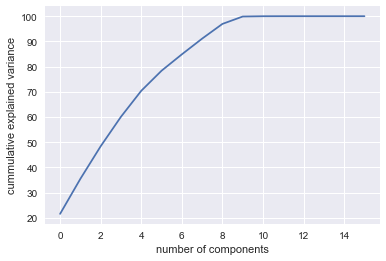

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

In [29]:
pca_fit=PCA(5).fit(df_dummy_scld)
pca_fit.explained_variance_ratio_.sum()

0.7040098153229274

In [23]:
res = pca.transform(df_dummy_scld)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]

In [28]:
df_PCA = pd.DataFrame(res, columns=df_dummy.columns[:],
                   index=index_name)[0:5]
df_PCA.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4
Limit,-1.518567e+00,2.784272e+00,-1.960238e-02,6.450832e-01,-1.633182e+00
Gender_Female,-1.458743e+00,1.963327e+00,8.158937e-01,-1.178752e+00,9.136343e-01
Income,-1.260089e+00,2.665799e+00,1.808587e+00,3.781824e+00,-7.541999e-02
Gender_Male,-4.194698e-01,-1.001434e+00,-6.600778e-01,-1.079598e-01,-1.876159e-01
Rating,-3.207810e-01,2.697907e+00,-2.078815e+00,4.222905e-02,-4.784145e-01
Student_No,-2.765311e-01,8.279031e-01,8.976582e-01,1.665093e+00,1.233826e-01
Student_Yes,-1.416327e-01,2.566749e-03,-1.015517e-01,1.649572e-02,-8.594816e-02
Balance,-8.893769e-02,5.265982e-02,5.662358e-01,-2.337454e-01,-1.028619e+00
Ethnicity_African American,-1.054712e-15,6.661338e-16,-8.881784e-16,1.110223e-16,-6.106227e-16
Ethnicity_Caucasian,-2.281161e-16,3.382711e-17,2.558717e-16,3.113829e-16,-3.946496e-16
